In [1]:
import dowhy.datasets
from dowhy.do_samplers.kernel_density_sampler import KernelDensitySampler
from dowhy.do_why import CausalModel
from dowhy.api.causal_data_frame import CausalDataFrame

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:

data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)

In [3]:
data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # without noise, the variance in Y|X, Z is zero, and mcmc fails.


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'U', 'X0'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


['X0']
yes
{'observed': 'yes'}
Model to find the causal effect of treatment v on outcome y
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler


INFO:dowhy.do_sampler:Using McmcSampler for do sampling.


treatments ['v']
backdoor ['X0']


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [y_sd, beta_y, v_sd, beta_v]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1550.20draws/s]


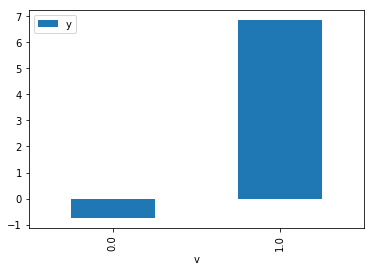

In [4]:
cdf = CausalDataFrame(df)
cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              keep_original_treatment=True,
              proceed_when_unidentifiable=True).groupby('v').mean().plot(y='y', kind='bar')

In [6]:
cdf = CausalDataFrame(df)


In [9]:
cdf_1 = cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = cdf.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True,
              use_previous_sampler=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'U', 'X0'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using McmcSampler for do sampling.


Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
['X0']
yes
{'observed': 'yes'}
Model to find the causal effect of treatment v on outcome y
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
treatments ['v']
backdoor ['X0']


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [y_sd, beta_y, v_sd, beta_v]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1479.09draws/s]
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'U', 'X0'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler


In [10]:
cdf_0

,X0,v,y
0,-0.679571,0,-0.540989
1,-0.243537,0,-0.816734
2,-0.195101,0,-0.420884
3,0.923288,0,0.543097
4,0.389773,0,2.000232
5,0.345340,0,-0.235523
6,0.539989,0,-0.191927
7,1.294383,0,1.841164
8,-0.557656,0,-1.179258
9,-0.581319,0,-1.585532


In [11]:
cdf_1

,X0,v,y
0,-0.679571,1,3.545042
1,-0.243537,1,4.665001
2,-0.195101,1,4.499220
3,0.923288,1,6.673522
4,0.389773,1,5.976617
5,0.345340,1,5.553557
6,0.539989,1,6.375131
7,1.294383,1,7.499560
8,-0.557656,1,3.655596
9,-0.581319,1,4.275826


In [13]:
cdf_1 = cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True,
              use_previous_sampler=False)
cdf_0 = cdf.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True,
              use_previous_sampler=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'U', 'X0'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using McmcSampler for do sampling.


['X0']
yes
{'observed': 'yes'}
Model to find the causal effect of treatment v on outcome y
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
treatments ['v']
backdoor ['X0']


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [y_sd, beta_y, v_sd, beta_v]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:08<00:00, 919.62draws/s] 
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'U', 'X0'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler


In [ ]:
(cdf_1['y'] - cdf_0['y']).mean()

In [ ]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(cdf))

In [ ]:
model = OLS(df['y'], df[['X0', 'v']])
result = model.fit()
result.summary()

In [ ]:
cdf_1

In [ ]:
cdf_0

In [ ]:
cdf_do = cdf.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True,
              keep_original_treatment=True)

In [ ]:
cdf_do